# Importando as bibliotecas

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Visualizando a imagem

Teoria sobre o grabcut neste [link](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html).

In [27]:
image_bgr = cv2.imread('cat.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

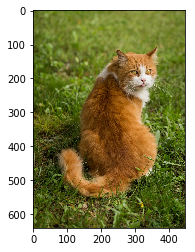

In [28]:
# Mostra a imagem
plt.imshow(image_rgb)
plt.show()

In [29]:
image_bgr.shape #Dimensões da imagem

(640, 446, 3)

In [38]:
# Valores do retangulo: começo em x, começo em y, largura, altura

retangulo = (70, 100, 300, 450)

In [39]:
# Cria máscara inicial
mascara = np.zeros(image_rgb.shape[:2], np.uint8)

#Criando arrays temporários 
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Roda a função grabCut
cv2.grabCut(image_rgb, mascara, retangulo, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT) 

#Cria uma máscara onde com certerza é o fundo com 0 do contrário coloca 1

mascara_2 = np.where((mascara==2) | (mascara==0), 0, 1).astype('uint8')

#Multiplica a imagem com a nova para subtrair o fundo
image_rgb_nobg = image_rgb * mascara_2[:, :, np.newaxis]

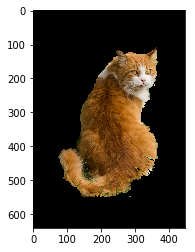

In [40]:
# Mostra a imagem
plt.imshow(image_rgb_nobg)
plt.show()